In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl

In [2]:
gdf = gpd.read_file('../data/Admin2_Topo.json')
gdf.head()

,id,ST_NM,geometry
0,None,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71975 7.20707, 93.71909 7.2..."
1,None,Arunanchal Pradesh,"POLYGON ((95.23730 26.67985, 95.23565 26.68179..."
2,None,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,None,Bihar,"MULTIPOLYGON (((84.50720 24.26324, 84.50356 24..."
4,None,Chandigarh,"POLYGON ((76.84148 30.75995, 76.83599 30.73624..."


In [3]:
df = pd.read_csv('../data/dbins.csv').drop('Unnamed: 0',axis=1)
df.columns = ['ST_NM', 'Cases', 'Case_bins', 'Case_bins_labels']

In [4]:
df.head()

,ST_NM,Cases,Case_bins,Case_bins_labels
0,Andhra Pradesh,4882,"(1000, 5000]",2
1,Assam,3051,"(1000, 5000]",2
2,Bihar,5455,"(5000, 20000]",3
3,Chandigarh,326,"(100, 1000]",1
4,Chhattisgarh,1211,"(1000, 5000]",2


In [5]:
set(df.ST_NM)-(set(gdf.ST_NM).intersection(set(df.ST_NM)))

set()

In [6]:
gdf = gdf.merge(df,how='left')
gdf2 = gdf.merge(df,how='inner')

In [7]:
gdf.head()

,id,ST_NM,geometry,Cases,Case_bins,Case_bins_labels
0,None,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71975 7.20707, 93.71909 7.2...",NaN,NaN,NaN
1,None,Arunanchal Pradesh,"POLYGON ((95.23730 26.67985, 95.23565 26.68179...",NaN,NaN,NaN
2,None,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",3051.0,"(1000, 5000]",2.0
3,None,Bihar,"MULTIPOLYGON (((84.50720 24.26324, 84.50356 24...",5455.0,"(5000, 20000]",3.0
4,None,Chandigarh,"POLYGON ((76.84148 30.75995, 76.83599 30.73624...",326.0,"(100, 1000]",1.0


In [8]:
gdf_points = gdf.copy()
gdf_points['geometry'] = gdf_points['geometry'].centroid

In [9]:
gdf_points['Cases_size'] = gdf_points['Cases']/2

In [10]:
gdf_points.sort_values(by='Cases')

,id,ST_NM,geometry,Cases,Case_bins,Case_bins_labels,Cases_size
22,None,Nagaland,POINT (94.46997 26.06167),127.0,"(100, 1000]",1.0,63.5
24,None,Puducherry,POINT (79.86600 11.98142),132.0,"(100, 1000]",1.0,66.0
19,None,Manipur,POINT (93.88123 24.73414),304.0,"(100, 1000]",1.0,152.0
4,None,Chandigarh,POINT (76.78147 30.73006),326.0,"(100, 1000]",1.0,163.0
8,None,Goa,POINT (74.05459 15.36141),359.0,"(100, 1000]",1.0,179.5
11,None,Himachal Pradesh,POINT (77.24865 31.92433),437.0,"(100, 1000]",1.0,218.5
30,None,Tripura,POINT (91.74363 23.74530),866.0,"(100, 1000]",1.0,433.0
5,None,Chhattisgarh,POINT (82.04258 21.26685),1211.0,"(1000, 5000]",2.0,605.5
13,None,Jharkhand,POINT (85.56397 23.65608),1416.0,"(1000, 5000]",2.0,708.0
32,None,Uttarakhand,POINT (79.20786 30.15318),1537.0,"(1000, 5000]",2.0,768.5


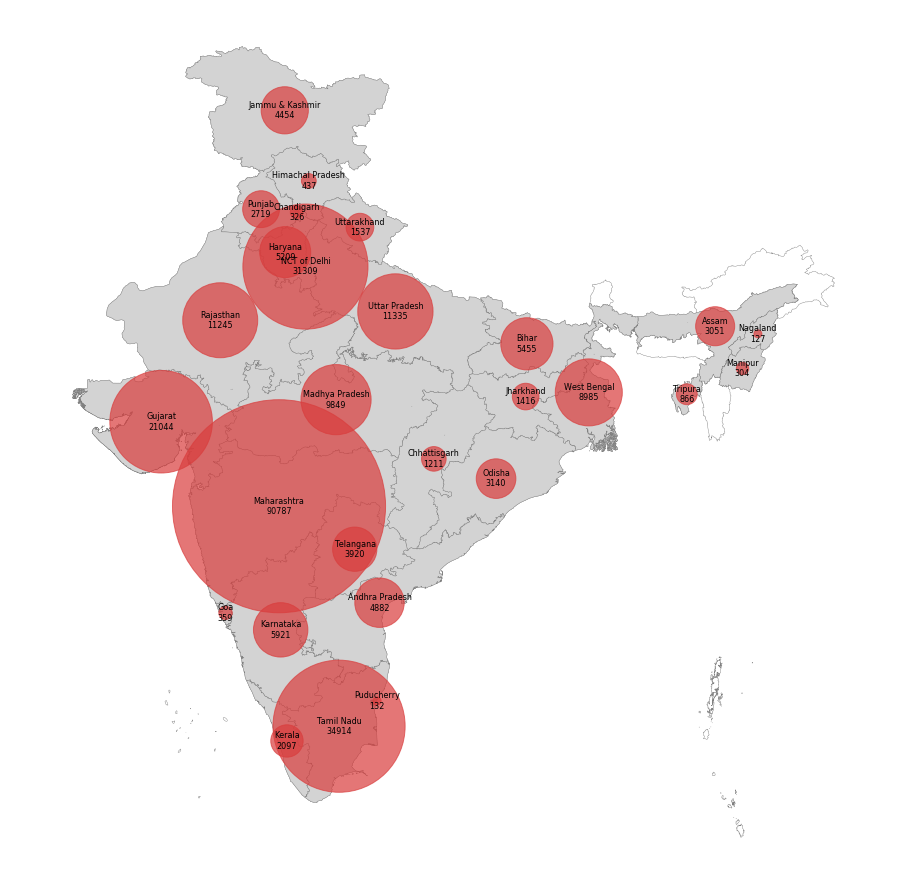

In [11]:
fig, ax = plt.subplots(figsize=(16,16))
gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.4)
gdf2.plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=0.4)
gdf2.apply(lambda x: ax.annotate(s=x.ST_NM+'\n'+str(int(x.Cases)), xy=x.geometry.centroid.coords[0], ha='center', va='center',size=8),axis=1);
gdf_points.plot(ax=ax,color='#d93d3d', markersize='Cases_size',alpha=0.7, categorical=True, legend=True )
ax.axis('off')
plt.axis('equal')
plt.savefig('../plots/figure1.png',dpi=120,bbox_inches='tight')